## Reliable Statistics

Statistics may be butt of jokes, but are often needed for business decisions, and sometimes required by law (See [US FDA's Code of Federal Regulations for medical devices](https://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfcfr/CFRSearch.cfm?fr=820.250))! This notebook covers basic concepts of reliability and confidence in statistics. It provides ready-to-use calculations and you can modify the parameters yourself to suit your needs.

If you are using this notebook locally, by cloning the repository, please follow instructions in `README.md` in the project's root directory.

If you are using this notebook on [Google colab](https://colab.research.google.com/github/sanjaymjoshi/relistats/blob/main/example/01_reliability_confidence.ipynb), you will need to install the `relistats` package first by executing the code block below. 

In [ ]:
!pip install relistats
!pip install tabulate

## Good Apples and Bad Apples

Suppose we run an apple picking business and want to figure out how much to pay our suppliers, apple orchards, based on the percentage of good apples. They might claim all their apples are good, but we want to confirm ourselves before we pay.

Let's say that the orchard delivers 90\% good apples. That means 9 in 10 apples will be good on an average. If we check 10 apples at random, how many will be good? Let's simulate with random numbers. But first, let's set a seed for the random number generator to make this notebook's results reproducible.

In [17]:
import random
random.seed(42) # To make this notebook reproducible


Let's show good apples using `O` and bad apples using `*`. Run the following block a few times to confirm that we don't always get 9 out of 10 good apples.

If you are using this notebook on Google colab, you can change parameters using the interface on the right and click the run button to regenerate the test samples. If you are running this locally on your computer, you can edit the code block below.

In [27]:
#@title Good and Bad Apples {vertical-output: true}
num_samples = 10 #@param {type:"integer"}
good_percent = 90 #@param {type:"integer"}

good_fraction = good_percent/100
samples = [random.random() for _ in range(num_samples)]
good_symbol = "O"
bad_symbol = "*"
result = "".join(good_symbol if x <= good_fraction else bad_symbol for x in samples)
print(f"Apples: Good = '{good_symbol}', bad = '{bad_symbol}'")
print(f"Test: {result}, {result.count(good_symbol)}/{len(result)} good.")


Apples: Good = 'O', bad = '*'
Test: OOOOOO*O*O, 8/10 good.


## Reliability and confidence

Even if all apples are good in our test sample, that does not mean all apples will be good for sure. Let's call the percentage of good apples "**reliability**". By using a small number of test samples, we want to estimate reliability. If we test more samples, our confidence in that estimate will be higher. Mathematically, **Confidence** in reliability is the probability that the actual reliability is better than that value.

In other words, if we test 10 samples and find that all of them are good, we will have some confidence that the reliability is at least 90%. If we test 20 samples instead of 10, our confidence will be higher.

Alternately, with the same 10 out of 10 good samples, our confidence in reliability of at least 80% will be higher than confidence in 90% reliability. Let's put some numbers on the levels of confidence.

This is the 'zero failure' case and mathematically, confidence $c$ in reliability $r$ with zero failures in $n$ samples is
$$
c = 1 - r^n
$$
This equation uses fractions, i.e., "90\%" will be used as "0.9".

Let's see how confidence changes with $r$ and $n$ in the zero-failure case. The results are shown in a graph in the code below and in a table format further down.

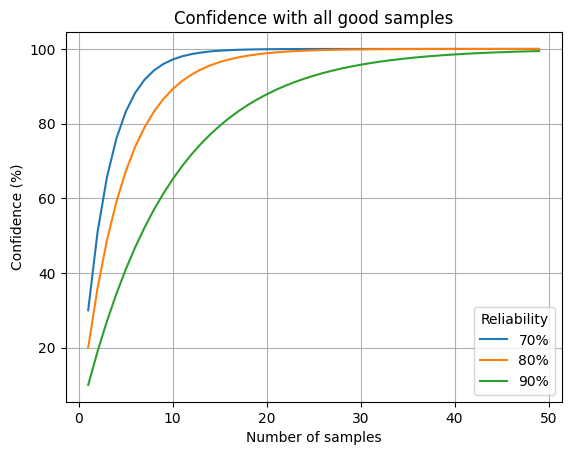

In [1]:
#@title Confidence plot {vertical-output: true}
from relistats.binomial import confidence
import matplotlib.pyplot as plt

n_start = 1 #@param {type:"integer"}
n_end = 50 #@param {type:"integer"}
n_step = 1 #@param {type:"integer"}
r_percent_start = 70 #@param {type:"integer"}
r_percent_end = 100 #@param {type:"integer"}
r_percent_step = 10 #@param {type:"integer"}

all_r_percent = range(r_percent_start, r_percent_end, r_percent_step)
all_n = range(n_start, n_end, n_step)
for rr in all_r_percent:
    # confidence may return None, so provide default of 0
    all_c = [(confidence(n, 0, rr/100) or 0)*100 for n in all_n]
    plt.plot(all_n, all_c, label=f"{rr:.0f}%")

plt.xlabel("Number of samples")
plt.ylabel("Confidence (%)")
plt.title("Confidence with all good samples")
plt.grid()
plt.legend(title="Reliability")
plt.show()


## Confidence Table

If we need a value, it is easier to see the results as values in a table instead of guessing them from a plot.


In [4]:
#@title Confidence table {vertical-output: true}
from relistats.binomial import confidence
from tabulate import tabulate
table_format = "simple" # for notebook

reli_percent = 90 #@param {type:"integer"}
n_start = 10 #@param {type:"integer"}
n_end = 50 #@param {type:"integer"}
n_step = 1 #@param {type:"integer"}
n_per_row = 5 #@param {type:"integer"}

rr = reli_percent/100
all_c = []
all_n_row_starts = range(n_start, n_end, n_per_row)
for n_row_start in all_n_row_starts:
    nn = range(n_row_start, n_row_start+n_step*n_per_row, n_step)
    # confidence may return None, so provide default of 0
    cc = [(confidence(n, 0, rr) or 0)*100 for n in nn]
    all_c.append(cc)

nh = range(n_start, n_start+n_step*n_per_row, n_step)
headers = ["n"] + ["%" for _ in nh]
print(f"Confidence levels in {reli_percent}% reliability with zero failures.")
print("Starting number of samples for each row is in first column.")
print(tabulate(all_c, tablefmt=table_format, headers=headers, floatfmt=".1f", showindex=all_n_row_starts))


Confidence levels in 90% reliability with zero failures.
Starting number of samples for each row is in first column.
  n     %     %     %     %     %
---  ----  ----  ----  ----  ----
 10  65.1  68.6  71.8  74.6  77.1
 15  79.4  81.5  83.3  85.0  86.5
 20  87.8  89.1  90.2  91.1  92.0
 25  92.8  93.5  94.2  94.8  95.3
 30  95.8  96.2  96.6  96.9  97.2
 35  97.5  97.7  98.0  98.2  98.4
 40  98.5  98.7  98.8  98.9  99.0
 45  99.1  99.2  99.3  99.4  99.4
